## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-007-004A-CNN-01 - MNIST Data Loader

In [1]:
import gzip
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import struct
import sys

try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve

# Config matplotlib for inline plotting
%matplotlib inline

In [2]:
def loadData(src, cimg):
    print ('Downloading ' + src)
    gzfname, h = urlretrieve(src, './delete.me')
    print ('Done.')
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x3080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))[0]
            if n != cimg:
                raise Exception('Invalid file: expected {0} entries.'.format(cimg))
            crow = struct.unpack('>I', gz.read(4))[0]
            ccol = struct.unpack('>I', gz.read(4))[0]
            if crow != 28 or ccol != 28:
                raise Exception('Invalid file: expected 28 rows/cols per image.')
            # Read data.
            res = np.fromstring(gz.read(cimg * crow * ccol), dtype = np.uint8)
    finally:
        os.remove(gzfname)
    return res.reshape((cimg, crow * ccol))

In [3]:
def loadLabels(src, cimg):
    print ('Downloading ' + src)
    gzfname, h = urlretrieve(src, './delete.me')
    print ('Done.')
    try:
        with gzip.open(gzfname) as gz:
            n = struct.unpack('I', gz.read(4))
            # Read magic number.
            if n[0] != 0x1080000:
                raise Exception('Invalid file: unexpected magic number.')
            # Read number of entries.
            n = struct.unpack('>I', gz.read(4))
            if n[0] != cimg:
                raise Exception('Invalid file: expected {0} rows.'.format(cimg))
            # Read labels.
            res = np.fromstring(gz.read(cimg), dtype = np.uint8)
    finally:
        os.remove(gzfname)
    return res.reshape((cimg, 1))

In [4]:
def get_download(dataSrc, labelsSrc, cimg):
    data = loadData(dataSrc, cimg)
    labels = loadLabels(labelsSrc, cimg)
    return np.hstack((data, labels))

In [5]:
# URLs for the train image and label data
url_train_image = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
url_train_labels = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
num_train_samples = 60000

print("Downloading Train data")
train = get_download(url_train_image, url_train_labels, num_train_samples)

# URLs for the test image and label data
url_test_image = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
url_test_labels = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
num_test_samples = 10000

print("Downloading Test data")
test = get_download(url_test_image, url_test_labels, num_test_samples)

Done.


C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


Done.


C:\Users\AndreVermeulen\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


Done.
Done.


Sample: 5550  =>  Image Label:  5


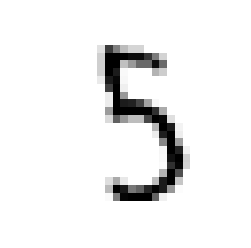

Sample: 5551  =>  Image Label:  5


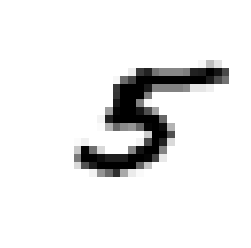

Sample: 5552  =>  Image Label:  1


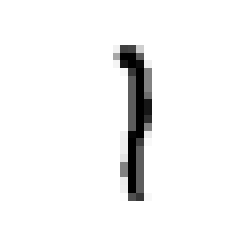

In [6]:
# Plot three random images
for sample_number in range(5550, 5553):
    plt.imshow(train[sample_number,:-1].reshape(28,28), cmap="gray_r")
    plt.axis('off')
    print("Sample:", sample_number, " => ", "Image Label: ", train[sample_number,-1])
    plt.show()

In [7]:
# Save the data files into a format compatible with text reader
def savetxt(filename, ndarray):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)
    
    if os.path.isfile(filename):
        os.remove(filename)

    if not os.path.isfile(filename):
        print("Saving", filename )
        lcnt=0
        with open(filename, 'w') as f:
            labels = list(map(' '.join, np.eye(10, dtype=np.uint).astype(str)))
            for row in ndarray:
                row_str = row.astype(str)
                label_str = labels[row[-1]]
                feature_str = ' '.join(row_str[:-1])
                lcnt+=1
                lcnt_str = str(lcnt)
                f.write('recid {} |labels {} |features {}\n'.format(lcnt_str, label_str, feature_str))
        print("File now exists", filename)
    else:
        print("File already exists", filename)

In [9]:
# Save the train and test files
data_dir = os.path.abspath(os.path.join("..","..", "data", "MNIST"))
print(data_dir)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST


In [10]:
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [11]:
print ('Writing Train text file...')
savetxt(os.path.join(data_dir, "Train-28x28_CNN_text.txt"), train)

Writing Train text file...
Saving C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST\Train-28x28_CNN_text.txt
File now exists C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST\Train-28x28_CNN_text.txt


In [12]:
print ('Writing test text file...')
savetxt(os.path.join(data_dir, "Test-28x28_CNN_text.txt"), test)

Writing test text file...
Saving C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST\Test-28x28_CNN_text.txt
File now exists C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\data\MNIST\Test-28x28_CNN_text.txt


## Done

In [13]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-21 08:21:31.112715
